Clean the dataset replace missing values, remove outliers etc.

Import the required libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/dataset - netflix1-Task2.csv")
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.shape

(8790, 10)

In [4]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
missing_values = df.isnull().sum()
missing_values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
df['director'].fillna('unknown',inplace = True)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


<Axes: >

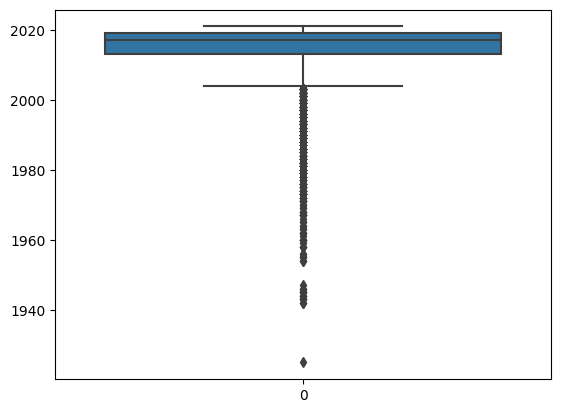

In [7]:
sns.boxplot(data=df['release_year'])

<Axes: >

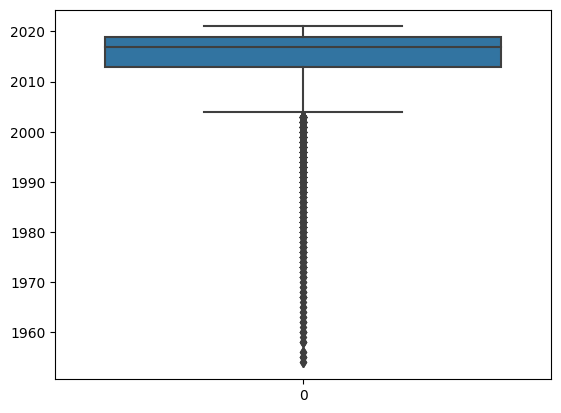

In [8]:
condition = df['release_year']>=1950
df = df[condition]
sns.boxplot(data = df['release_year'])


Dropping unwanted Categorical Columns

In [9]:
df.drop('show_id',axis = 1,inplace = True)

In [10]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [11]:
df.drop('listed_in',axis = 1,inplace = True)

In [12]:
def convert_duration(duration_str):
    if 'min' in duration_str:
        try:
            return int(duration_str.split()[0])
        except ValueError:
            pass
    elif 'Season' in duration_str:
        try:
            num_seasons = int(duration_str.split()[0])
            return num_seasons * 10 * 45
        except ValueError:
            pass
    return duration_str
df['duration'] = df['duration'].astype(str)
df['duration']=df['duration'].apply(convert_duration)
df.head()




,type,title,director,country,date_added,release_year,rating,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,450
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,450
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125


In [13]:
unique_ratings = df['rating'].unique()
for rating in unique_ratings:
    print(rating)

PG-13
TV-MA
TV-PG
TV-14
TV-Y7
TV-Y
PG
TV-G
R
G
NC-17
NR
TV-Y7-FV
UR


In [14]:
rating_mapping = {
    'PG-13': 1,
    'TV-MA': 2,
    'TV-PG': 3,
    'TV-14': 4,
    'TV-Y7': 5,
    'TV-Y': 6,
    'PG': 7,
    'TV-G': 8,
    'R': 9,
    'G': 10,
    'NC-17': 11,
    'NR': 12,
    'TV-Y7-FV': 13,
    'UR': 14
}
df['rating'].replace(rating_mapping, inplace=True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,1,90
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,2,450
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,2,450
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,3,91
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,2,125
